In [3]:
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

                            OLS Regression Results                            
Dep. Variable:      playoff_games_won   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     2.118
Date:                Sat, 22 Nov 2025   Prob (F-statistic):             0.0424
Time:                        10:50:53   Log-Likelihood:                -134.28
No. Observations:                  96   AIC:                             286.6
Df Residuals:                      87   BIC:                             309.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4562      1.408      0.324      0.7

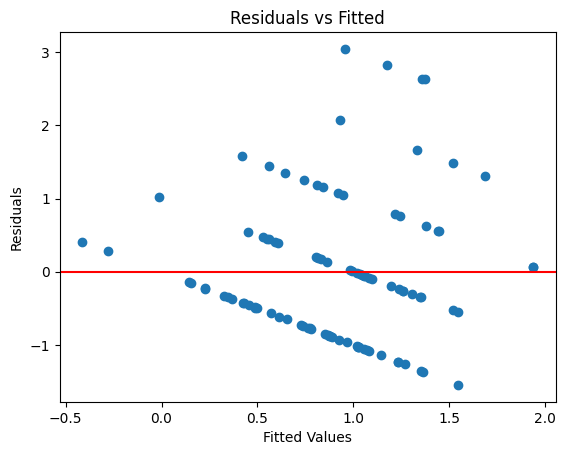

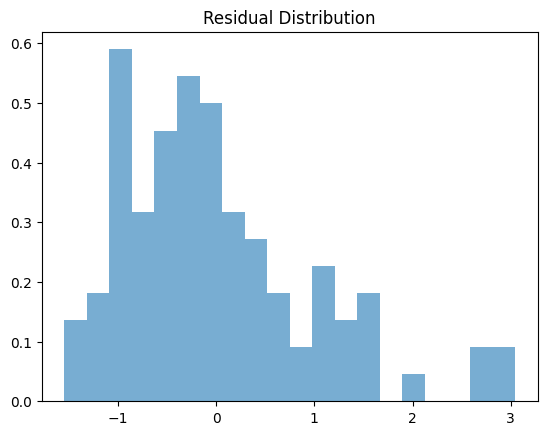

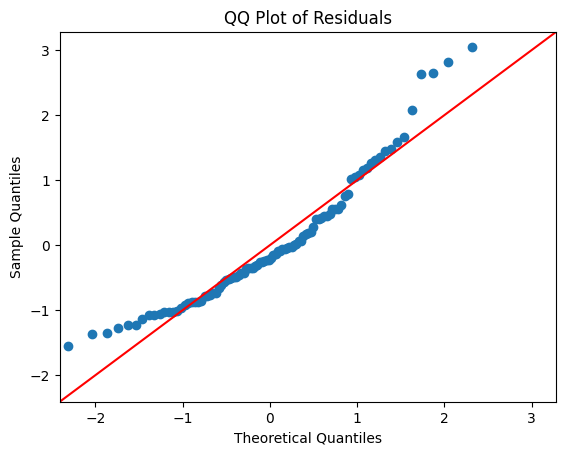

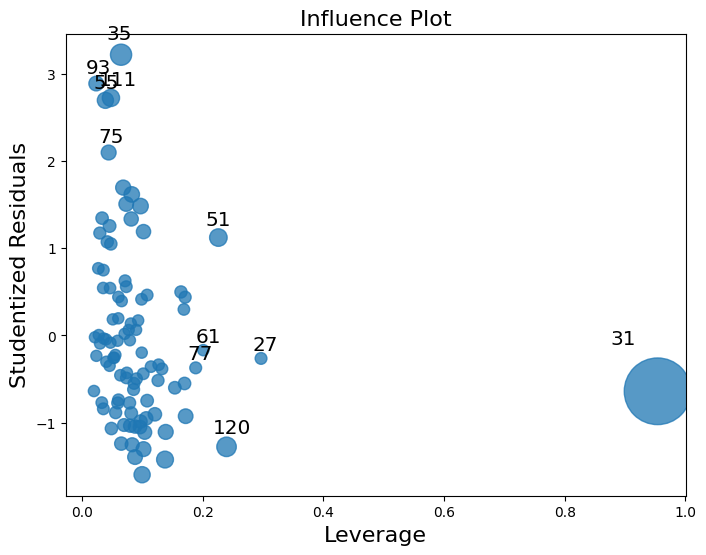

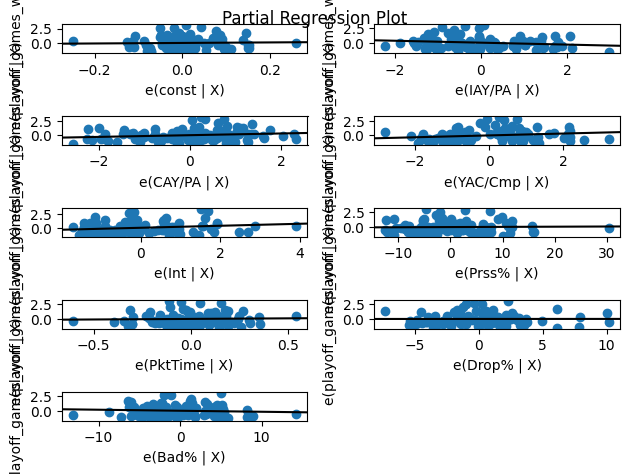

In [4]:
df = pd.read_csv("clean_playoff_passing.csv")

predictors = [
    "IAY/PA",        # Intended Air Yards per Attempt
    "CAY/PA",        # Completed Air Yards per Attempt (or use CAY/Cmp instead)
    "YAC/Cmp",       # Yards after Catch per Completion
    "Int",           # Interceptions
    "Prss%",         # Pressure %
    "PktTime",       # Time to throw / pocket time
    "Drop%",         # Drop rate
    "Bad%",          # Bad throw rate
]

# Make sure columns exist
for col in predictors:
    if col not in df.columns:
        print(f"Missing column: {col}")

X = df[predictors]
y = df["playoff_games_won"]

# Drop rows with any missing values (common in football data)
combined = pd.concat([X, y], axis=1).dropna()
X = combined[predictors]
y = combined["playoff_games_won"]

# Add constant
X_const = sm.add_constant(X)

# 3. Fit linear model
model = sm.OLS(y, X_const).fit()
print(model.summary())

# 4. Check VIF for multicollinearity
vif_df = pd.DataFrame()
vif_df["Variable"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
print("\nVariance Inflation Factors:")
print(vif_df)

# 5. Residual Diagnostics
# Residuals
residuals = model.resid
fitted = model.fittedvalues

# Plot: Residuals vs Fitted (Homoscedasticity + linearity)
plt.scatter(fitted, residuals)
plt.axhline(0, color='r')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# Plot: Histogram + density of residuals (Normality)
plt.hist(residuals, bins=20, density=True, alpha=0.6)
plt.title("Residual Distribution")
plt.show()

# QQ Plot for normality
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.show()

# Influence Plot (high leverage points)
fig, ax = plt.subplots(figsize=(8,6))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()

fig = sm.graphics.plot_partregress_grid(model)


In [ ]:
#lasso regression process

In [ ]:
#CV